In [178]:
import pandas as pd
import numpy as np
from matplotlib import style, font_manager, rc
import matplotlib, matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [179]:
# 사고 정보 데이터 불러오기
ac_data = pd.read_excel("2014 경찰청 사고 정보 데이터.xlsx")
ac_data.columns=['사고년월','법정동코드','HIT법정동코드','사고상황','code']
ac_data = ac_data.drop(0)

In [180]:
# 법정동 코드 정보 불러오기
code1 = pd.read_excel("법정동코드.xls")
code1.columns=['법정동코드','법정동','a','2','3','4','5']
del code1["a"]
code2=code1.dropna(how="any", axis=1)

In [181]:
# 사고 정보 데이터와 법정동 코드를 '법정동코드'로 합치기
result = pd.merge(ac_data, code1, on=['법정동코드'])

In [182]:
# font와 해상도 설정
font_location ="C:/Windows/Fonts/HMKMRHD.TTF"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)  
fig=plt.figure(dpi= 500)

In [183]:
# 격자 그리기
sns.set(style="darkgrid")

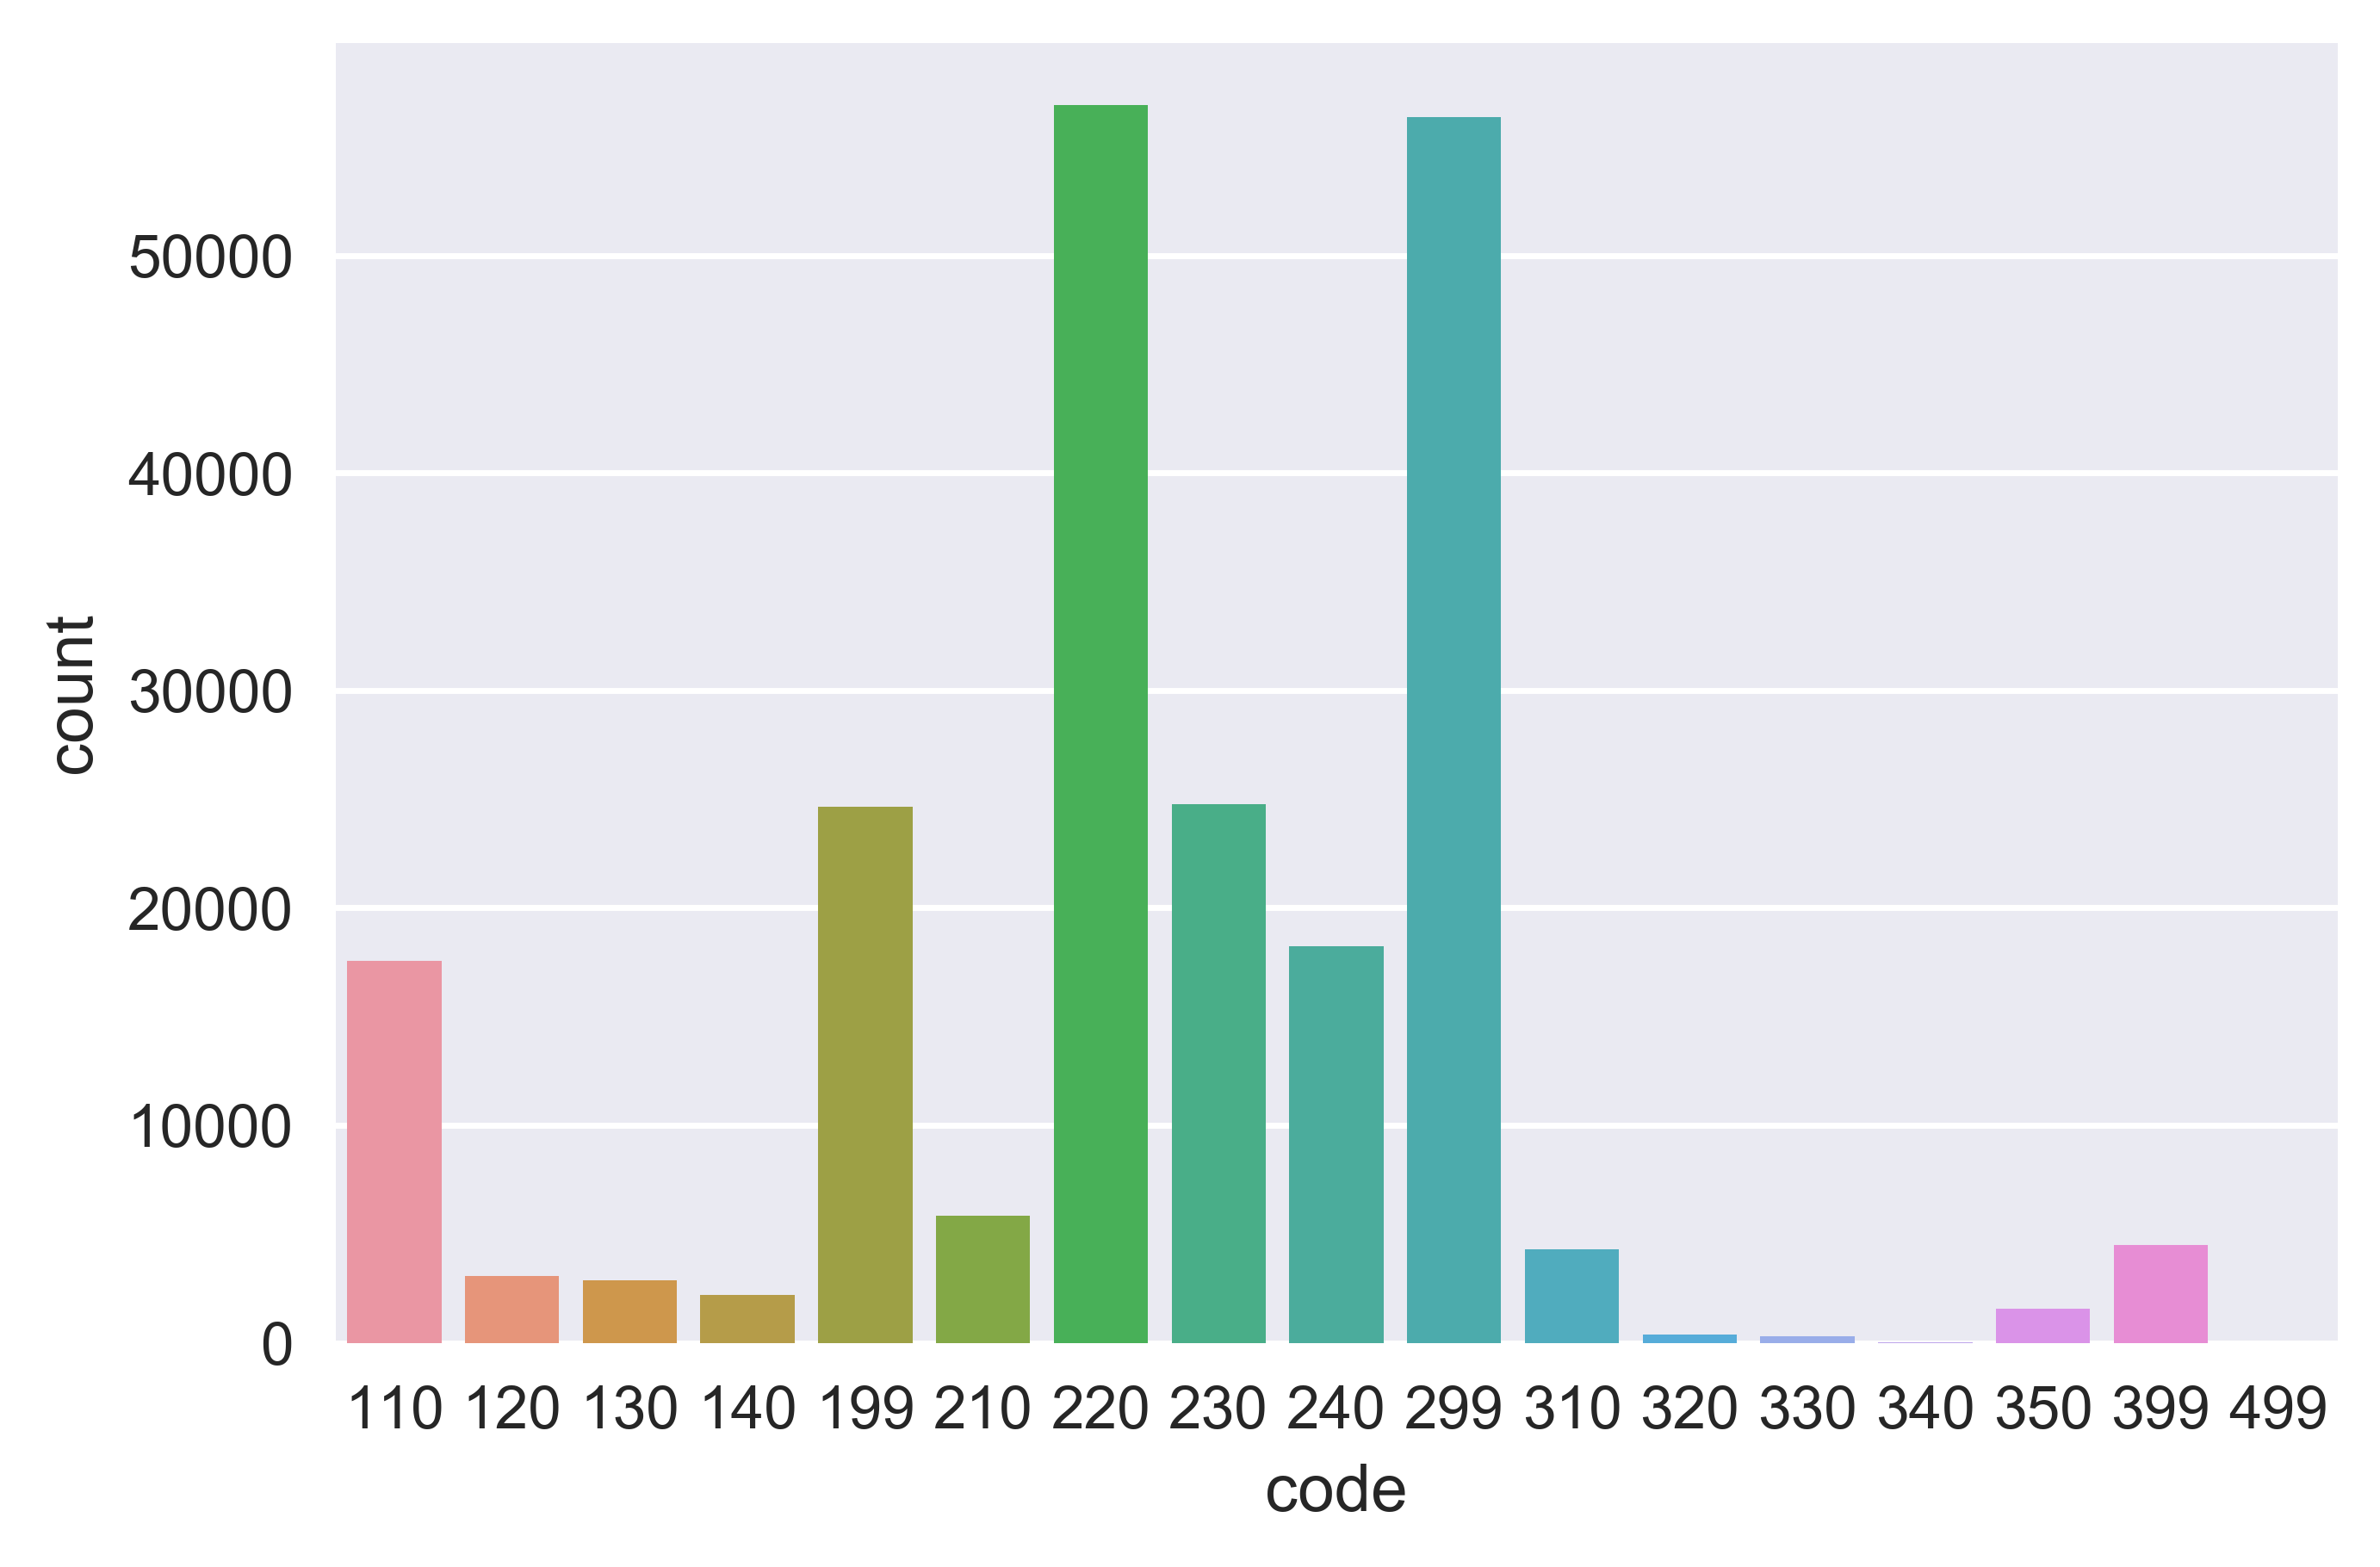

In [184]:
# 전체 지역에서 사고 유형별 빈도수 그래프 그리기
graph = sns.countplot(x="code", data = result)
plt.show()

In [185]:
# 법정동으로 groupby
result1 = result.groupby("법정동")

In [186]:
# 각 도별로 사고유형코드 개수 세기
result2 = result1["code"].value_counts() 

In [189]:
# 도 리스트 생성 
m_list = ['서울특별시','강원도','경기도','경상남도','경상북도','광주광역시','대구광역시','대전광역시','부산광역시','세종특별자치시','울산광역시','인천광역시','전라남도','전라북도','제주특별자치도','충청남도','충청북도']

In [192]:
# font와 해상도 설정
font_location ="C:/Windows/Fonts/HMKMRHD.TTF"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)  
fig=plt.figure(dpi= 500)

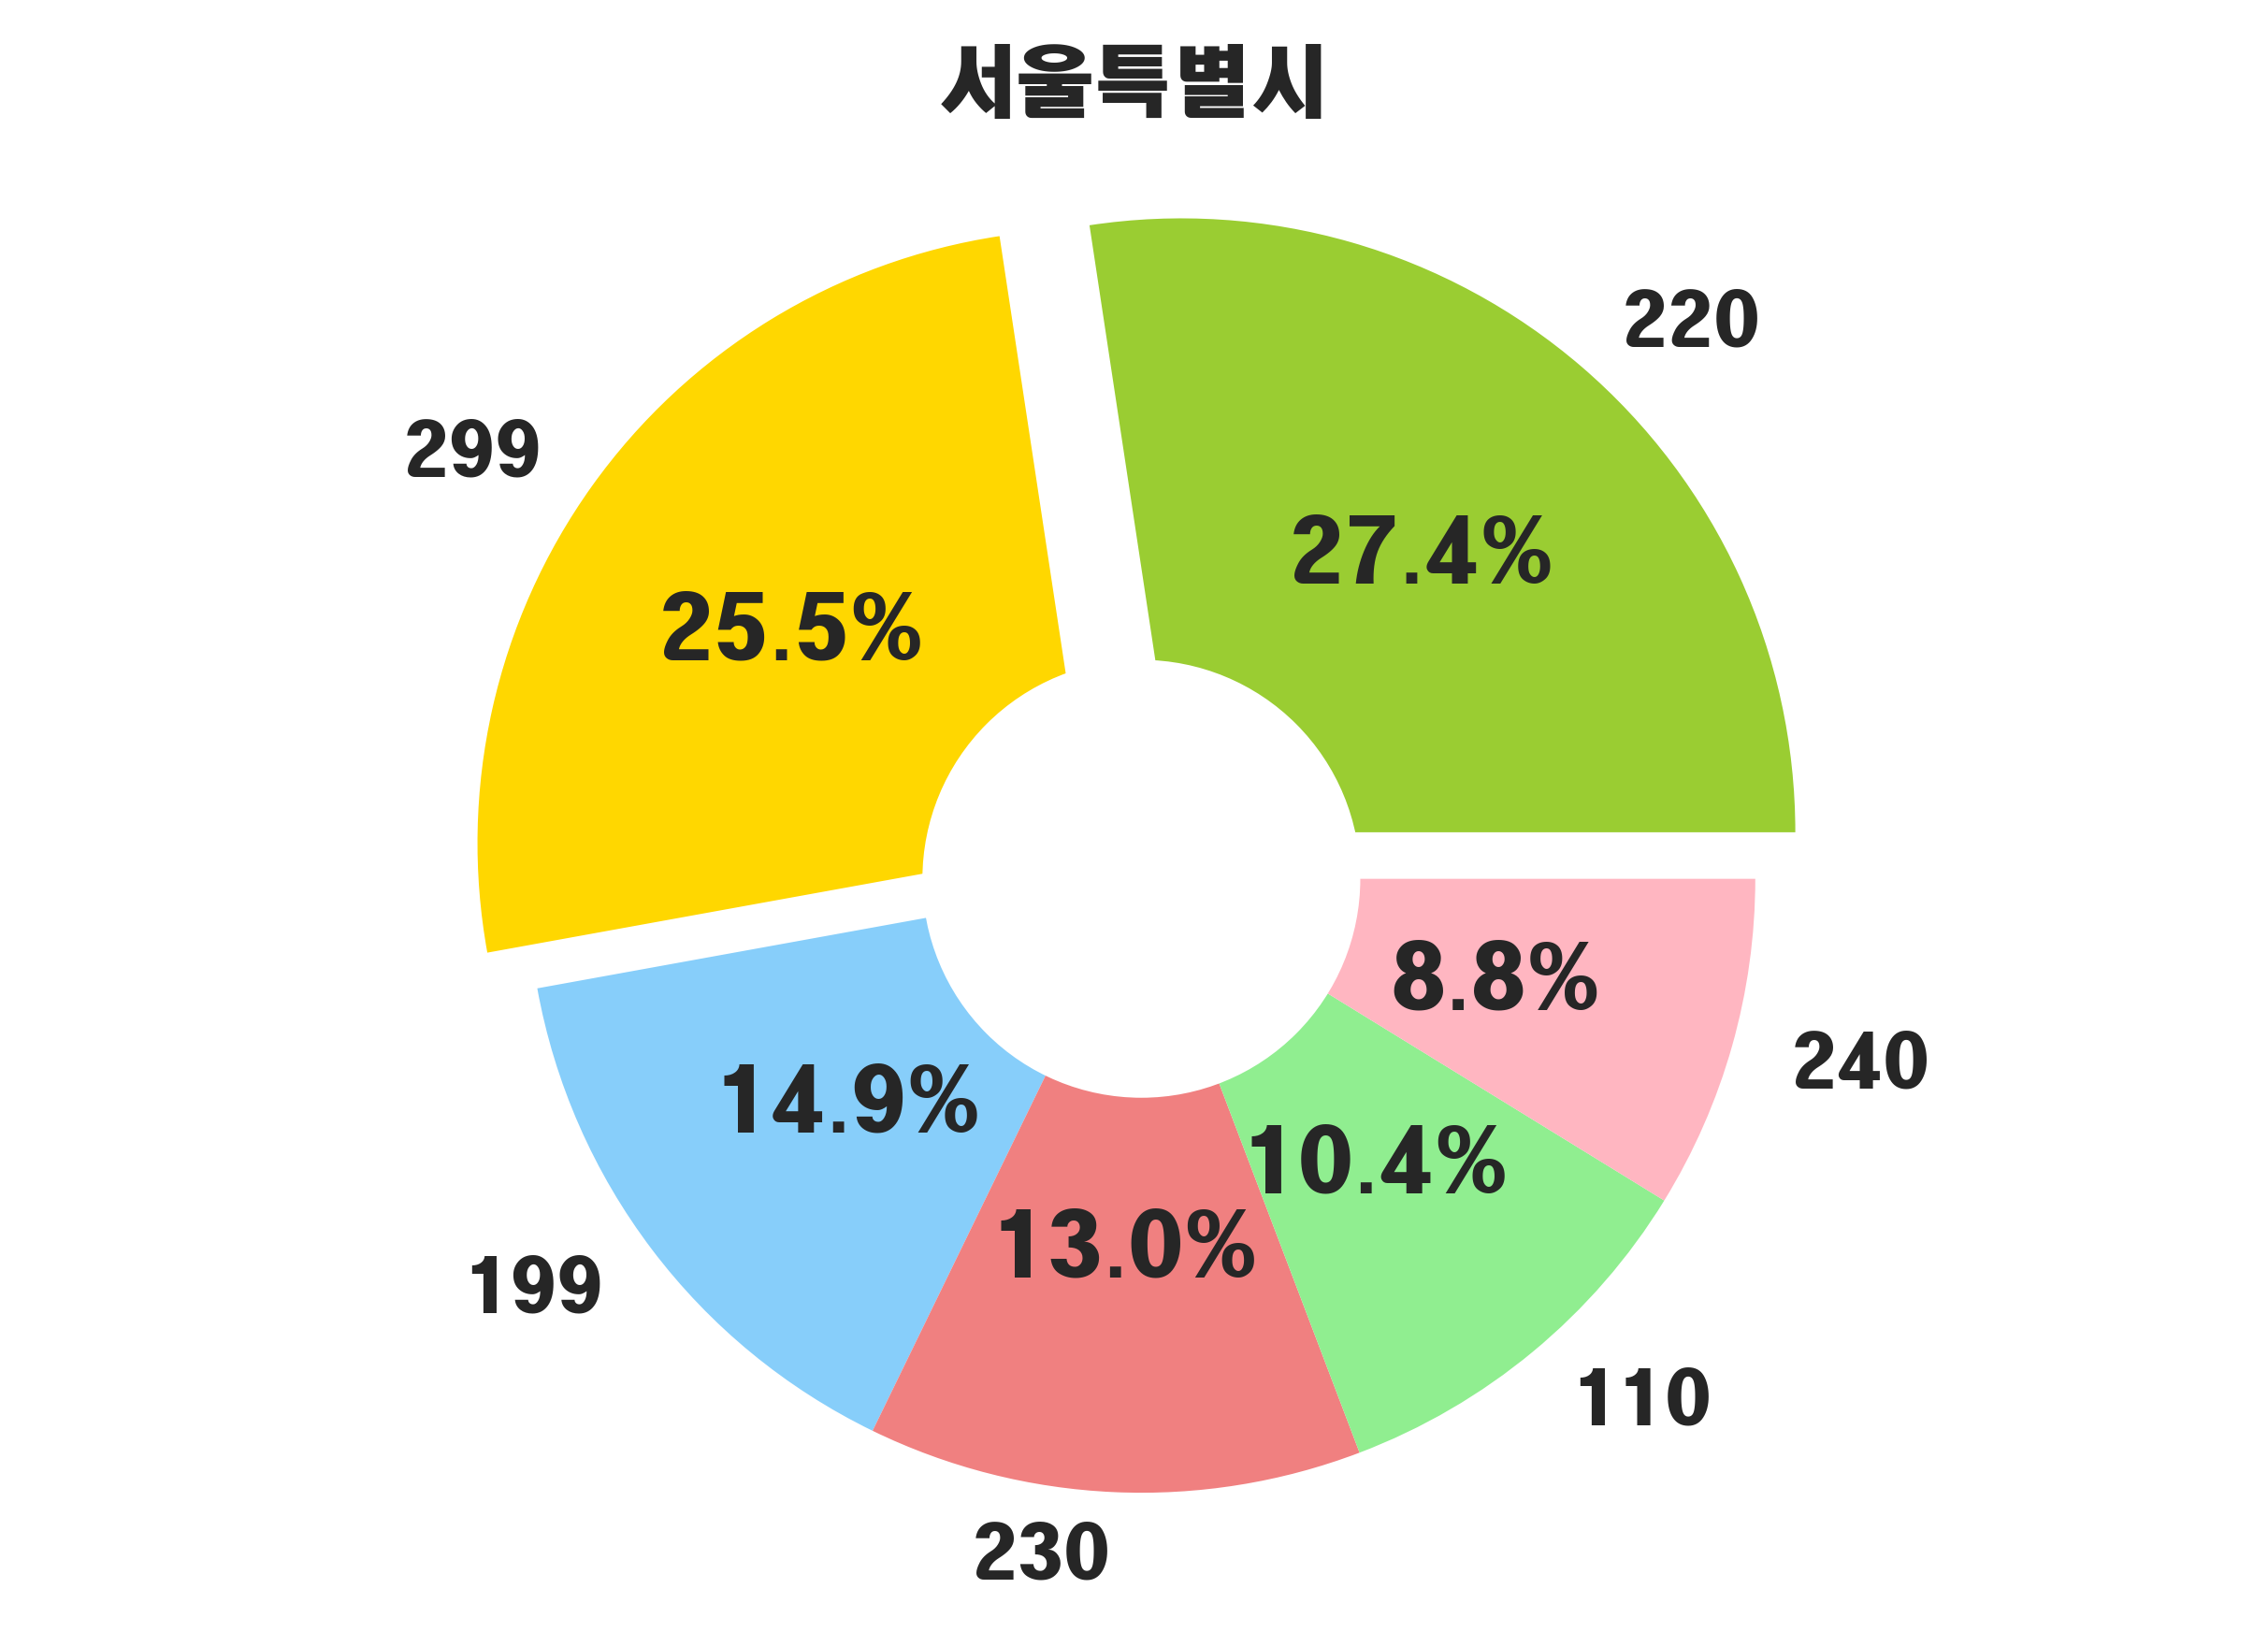

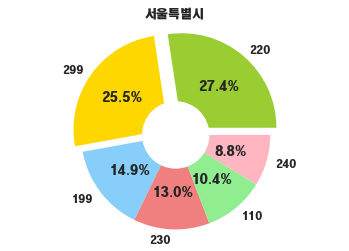

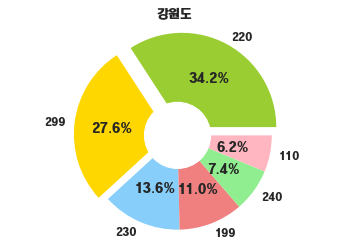

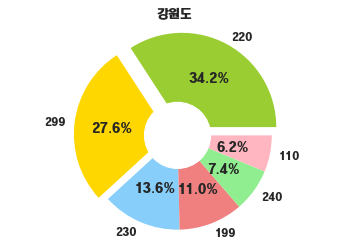

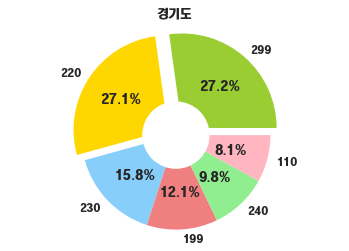

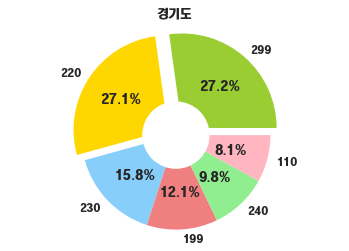

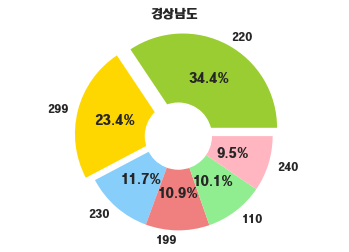

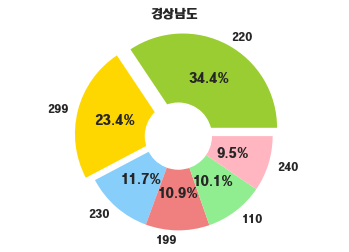

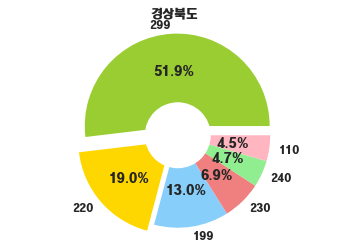

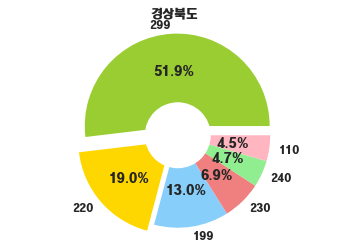

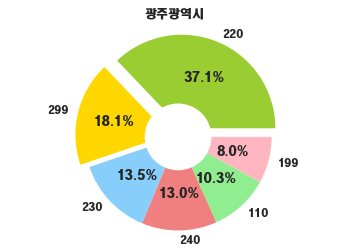

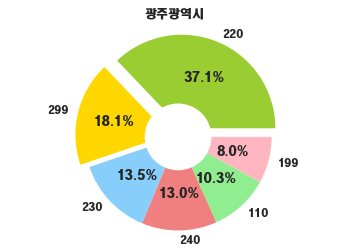

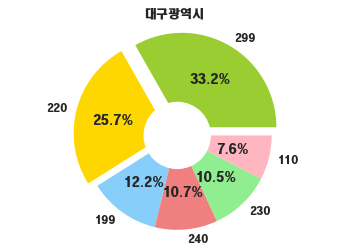

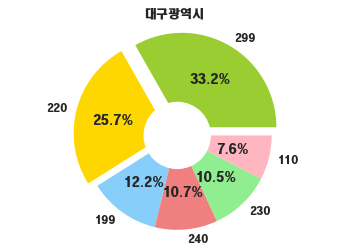

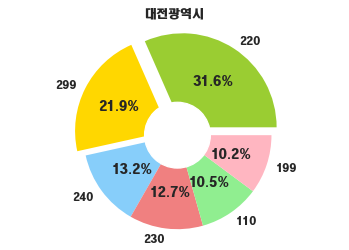

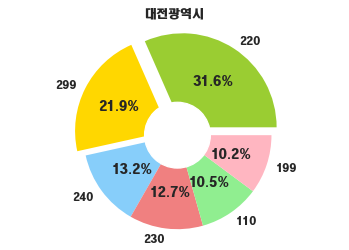

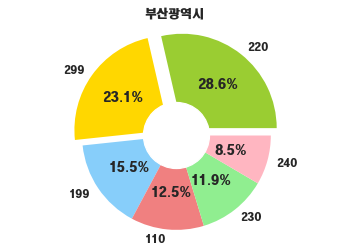

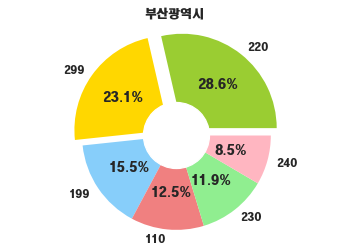

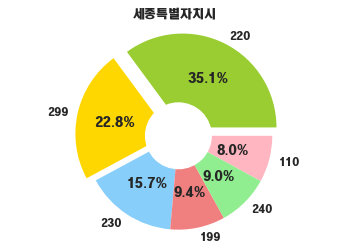

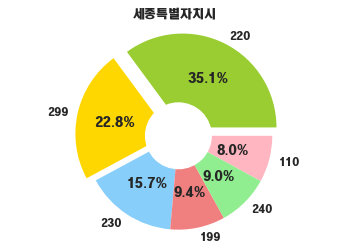

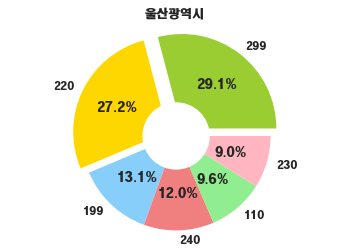

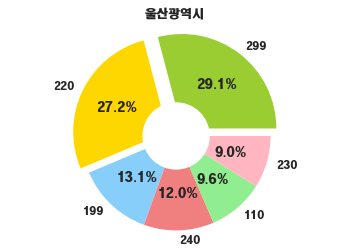

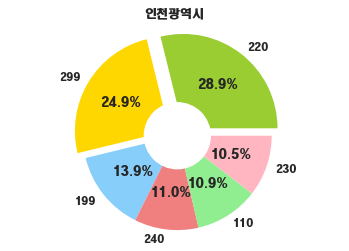

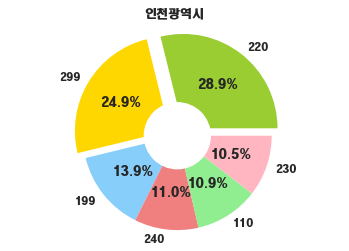

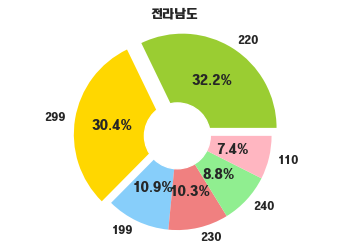

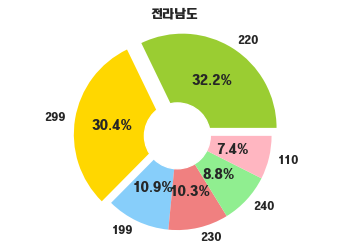

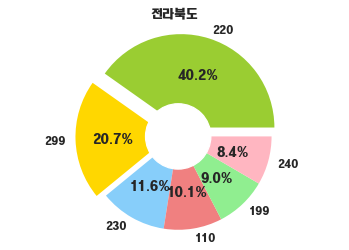

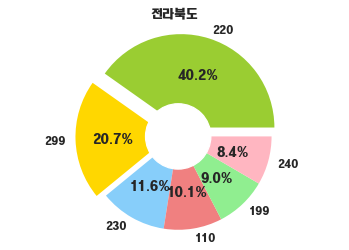

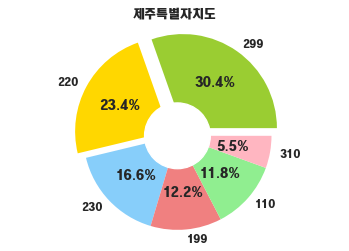

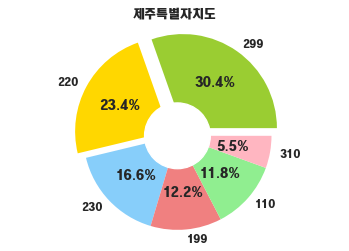

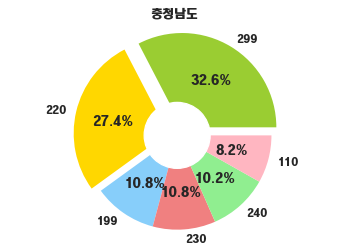

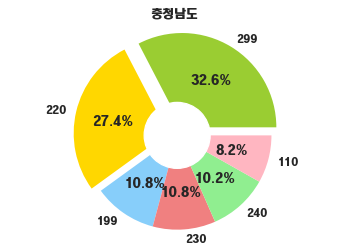

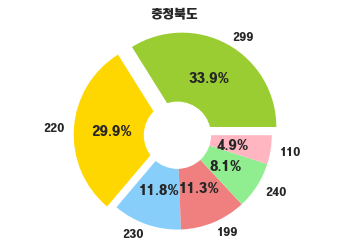

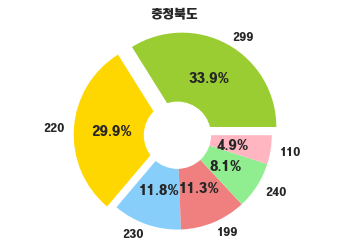

In [193]:
# 도별 상위 6개로 파이 그래프 그리기
for i in m_list:
    a=result2['%s' %i]
    b = pd.DataFrame(a)
    b.columns = ['빈도수']
    c = b[:6]
    c.reset_index()
    
    labels = c.index
    sizes = c.빈도수
    colors = ['yellowgreen','gold','lightskyblue', 'lightcoral','lightgreen','lightpink']
    
    sizes = c.빈도수
    
    explode = (0.1,0.1,0,0,0,0)
   

    plt.pie(sizes, labels = labels, autopct = '%1.1f%%', explode=explode, colors = colors)

    centre_circle = plt.Circle((0,0),0.35,color='white',fc='white',linewidth=1.25 )
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title('%s' %i)
    plt.axis('equal')
    plt.show()
    

    
    
 

In [44]:
# result2를 데이터프레임 형식으로 읽어오기
result3 = pd.DataFrame(result2)
result3.columns = ['빈도수']

In [150]:
# result2 unstack
result4 = result2.unstack(level=0)
result4.head()

법정동,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
code,,,,,,,,,,,,,,,,,
110,475.0,3471.0,1169.0,613.0,750.0,1010.0,539.0,1406.0,3850.0,33.0,439.0,860.0,632.0,843.0,474.0,584.0,396.0
120,86.0,608.0,266.0,104.0,176.0,153.0,96.0,218.0,606.0,3.0,57.0,171.0,153.0,169.0,19.0,126.0,48.0
130,99.0,519.0,209.0,93.0,160.0,159.0,116.0,303.0,605.0,1.0,68.0,117.0,106.0,94.0,11.0,117.0,95.0
140,71.0,445.0,122.0,49.0,91.0,186.0,106.0,133.0,549.0,3.0,33.0,111.0,47.0,128.0,13.0,60.0,41.0
199,837.0,5217.0,1262.0,1772.0,586.0,1624.0,524.0,1740.0,5508.0,39.0,602.0,1094.0,925.0,747.0,489.0,775.0,911.0


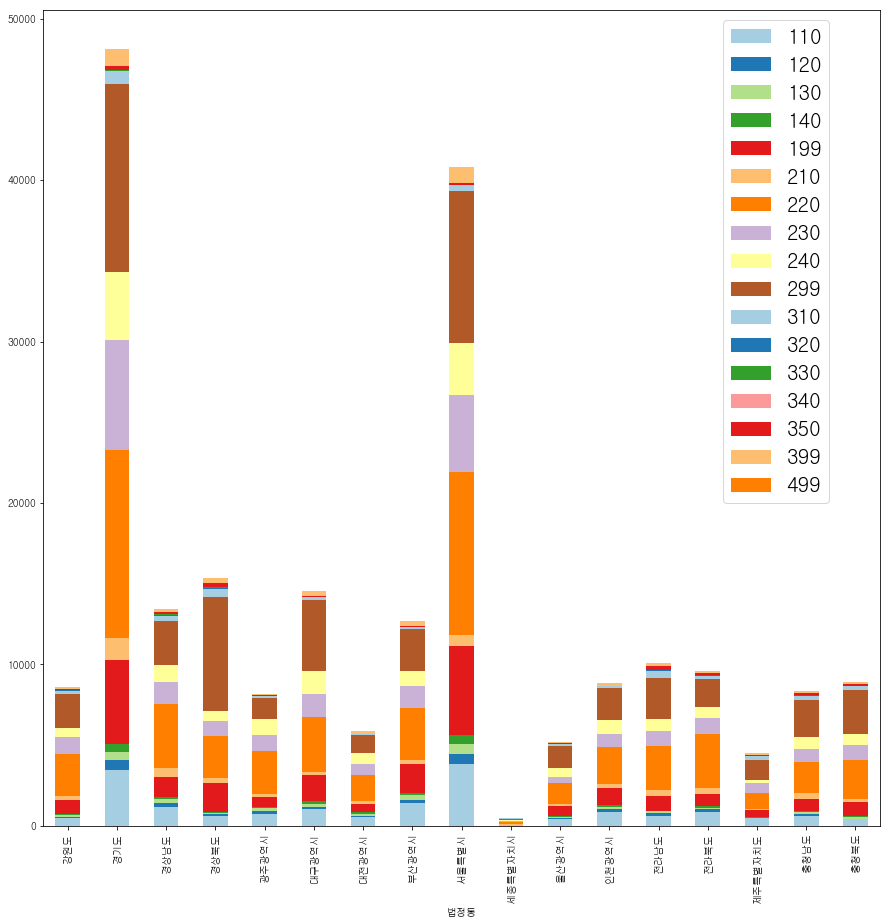

In [149]:
# 누적 그래프 그리기
kk = result4.T.plot(kind='bar', stacked=True,
            colormap=ListedColormap(sns.color_palette("Paired",20)),
            figsize=(15,15))
kk.legend(loc=2, prop={'size': 20},bbox_to_anchor=(0.8, 1.0))

plt.show()